# Preprocessing

In [30]:
from unicodedata import normalize
import pandas as pd
import re
import regex
import nltk
nltk.download('stopwords')

#Plotagem
%matplotlib inline 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adrie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df = pd.read_csv('job_bioinfo_csv/bioinf_ads_deduplicated.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,word_count
0,0,0,http://diffbot.com/entity/JOB966384586,en,JOB966384586,1591962958,"Bioinformatics Specialist, GIS",https://www.nature.com/naturecareers/job/bioin...,NaN,NaN,The Genomics Institute of Singapore () has an ...,NaN,The Genomics Institute of Singapore () has an ...,"Bioinformatics Specialist, GIS",Job,130
1,1,1,http://diffbot.com/entity/JOB1028283361,en,JOB1028283361,1549734701,Postdoctoral Fellowship in Bioinformatics and ...,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,"The laboratories of Drs. Jeffrey Pessin, Fajun...",NaN,"The laboratories of Drs. Jeffrey Pessin, Fajun...",Postdoctoral Fellowship in Bioinformatics and ...,Job,231
2,2,2,http://diffbot.com/entity/JOB1570298833,en,JOB1570298833,1486437231,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",http://www.nature.com/naturejobs/science/jobs/...,NaN,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",Job,179
3,3,3,http://diffbot.com/entity/JOB2313411533,en,JOB2313411533,1629620706,Postdoctoral Fellow in Bioinformatics and/or G...,https://www.nature.com/naturecareers/job/postd...,"Must hold a Ph.D. degree, with publications in...",NaN,We are looking for enthusiastic postdoctoral f...,NaN,We are looking for enthusiastic postdoctoral f...,Postdoctoral Fellow in Bioinformatics and/or G...,Job,351
4,4,4,http://diffbot.com/entity/JOB2513853425,en,JOB2513853425,1563630178,"Postdoctoral Position in Bioinformatics, Micro...",https://www.nature.com/naturecareers/job/postd...,NaN,NaN,Work group:\nInstitute of Virology\nArea of re...,NaN,Work group:\nInstitute of Virology\nArea of re...,"Postdoctoral Position in Bioinformatics, Micro...",Job,525


In [3]:
len(df)

2016

In [19]:
def pre_processing(text):
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')

    # List with additional stopwords not removed by nltk
    stopwords.extend(['see', 'use', 'please', 'send', 'e g', 'us', 'in', 'ii', 'iii', 'cv', 'find', 'well',
                     'zhiping weng', 'within', 'ta','new york', 'farber', 'ithaca', 'cornell', 'albert', 'umass',
                      'nih','niab', 'afbi', 'st', 'duke','jude', 'leibniz', 'hki', 'leibniz', 'dfci', 'dana',
                      'faber', 'emilie', 'ensure','entering', 'login', 'password', 'account', 'email', 'coversheet',
                      'logged','checked','choosing','checkbox', 'proceed','done','asked','already','fill',
                      'academicjobsonline', 'universitywelcome', 'free', 'form', 'selected', 'european', 'asco', 
                      'american','powered','rigths','reserved', 'england', 'andme', 'else', 'hd', 'omrf', 'ouhsc',
                      'oklahoma', 'needs', 'umuc', 'sorry', 'address', 'frances', 'london', 'germany', 'crick', 'kth', 'kths', 'icmr',
                      'aarhus', 'org', 'inida', 'bt', 'madgex', 'ebi', 'embl', 'colorado', 'cambridge', 'rights',
                      'expired', 'click', 'page', 'still', 'many', 
    ])
    # Text adaptation
    adp_text = str(text).lower()  
    adp_text = re.sub(r'http\S+|www\S+', '', adp_text)  # Remove URLs
    #adp_text = re.sub("[\(\[].*?[\)\]]", "", (adp_text))
    adp_text = re.sub(r"\(([^)]+)\)", r"\1", (adp_text))  # Remove parentheses and brackets but keep the internal content
    adp_text = adp_text.replace('\n', '').strip()  # Remove line breaks
    adp_text = re.sub(r"[0-9]+", "", (adp_text))  # Remove numbers
    
    # Remove accents
    acent_text = normalize('NFKD', adp_text).encode('ASCII','ignore').decode('ASCII')
          
    # Remove listed characters and excessive spaces
    ponct_text = re.sub(r"\.|,|;|:|-|!|\?|´|`|^|'|]|\[|_|@|=|\(|\)| |\$|~|\||<|\"|>|&|\*|/|%", " ", acent_text)
    
    ponct_text = ponct_text.strip()
    ponct_text = " ".join(ponct_text.split())
    
    # Remove stopwords from the text
    for sw in stopwords:
        stop_text = re.sub(r'\b(%s)\b[\s.,;:?!]' % '|'.join(stopwords), '', ponct_text)
    
    return stop_text


In [20]:
df['text_result'] = df['text'].apply(pre_processing)
df['title_result'] = df['title'].apply(pre_processing)

In [23]:
df.text_result

0       genomics institute singapore exciting opportun...
1       laboratories drs jeffrey pessin fajun yang dey...
2       tweetfacebooklinkedinthe mdi biological labora...
3       looking enthusiastic postdoctoral fellows join...
4       work group institute virologyarea research sci...
                              ...                        
2011    school life sciences ecole polytechnique feder...
2012    departmentimagine transforming face biomedical...
2013    assistant professor rna computational biology ...
2014    descriptionthe osmanbeyoglu lab osmanbeyoglula...
2015    pharmabiomics leveraging high resolution multi...
Name: text_result, Length: 2016, dtype: object

In [33]:
def word_cloud(data, target):  
    all_words = ' '.join([str(text) for text in data[target]]) 
    

    word_cloud = WordCloud(width= 800, height= 500, max_words=100,
                             max_font_size = 110, background_color="white").generate(all_words)


    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('img/word_cloud.png')
    plt.show 

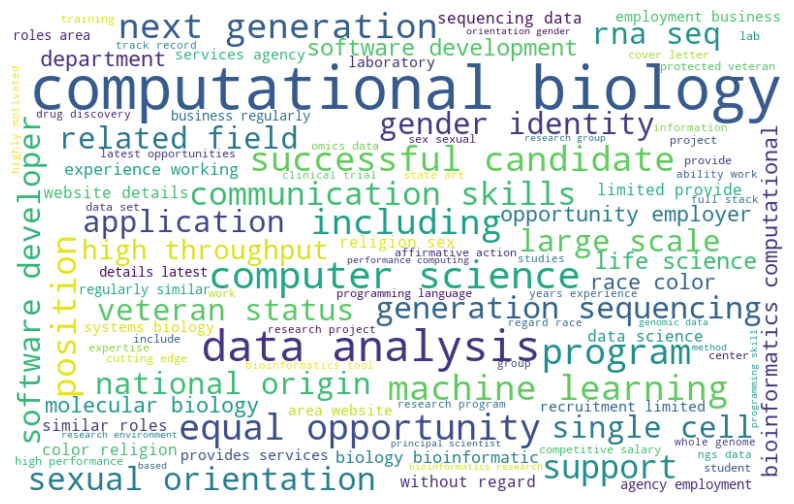

In [35]:
word_cloud(df, "text_result") 

In [29]:
df.to_csv('job_bioinfo_csv/bioinf_ads_preprocessed.csv')